One Hot Encoder
---
**Resumen y usos**

El método de codificación Label Encoding (*ordinal encoding*) es una forma sencilla de asignar valores numéricos a las diferentes categorías de una variable categórica. Sin embargo, presenta una limitación importante, y es que estos valores numéricos pueden ser malinterpretados por algunos algoritmos de aprendizaje automático. Por ejemplo, si codificamos cuatro ciudades con los valores 0, 1, 2 y 3, es posible que un algoritmo interprete erróneamente que, por ejemplo, la ciudad correspondiente al valor 3 tiene -según algún criterio- un valor tres veces mayor que la ciudad con el valor 1, lo cual no es cierto.

*Ordinal Encoding*

<div>
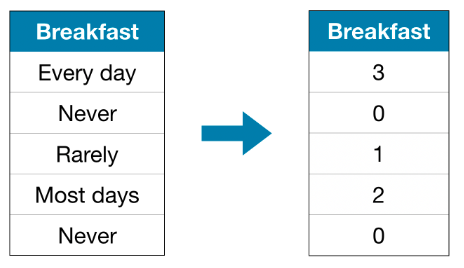
</div>

En este ejemplo, se puede asumir fácilmente un ranking de categorías, en donde "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).
No siempre es así, porque puede suceder que las categorías no tengan un raning asociado, como por ejemplo: "hombre" y "mujer", o "rojo", "verde" y "amarillo". 

*One Hot Encoding*

Una alternativa al Label Encoding es el método de codificación llamado One Hot Encoding. Esta estrategia consiste en crear una columna binaria (que solo puede contener los valores 0 o 1) para cada valor único que exista en la variable categórica que estamos codificando, y marcar con un 1 la columna correspondiente al valor presente en cada registro, dejando las demás columnas con un valor de 0. Por ejemplo, en el caso de la variable "sexo", One Hot Encoding crearía dos columnas binarias (una para el valor "hohmbre" y otra para el valor "mujer"). Para cada persona, se asignaría un valor de 1 a la columna correspondiente a su género y un valor de 0 a la columna del género opuesto. De esta manera, **cada registro queda representado por un vector binario** que indica la presencia o ausencia de cada valor categórico, y se evita la posibilidad de que los algoritmos malinterpreten los valores numéricos asignados por Label Encoding.
En contraste con Label Encoding, el método de OHE no asume un orden específico para las categorías.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.
Éste método es necesario para alimentar con datos de categorías a varios modelos de estimación de scikit-learn, especialmente modelos lineales y SVMs (Suport Vector Machine, modelos de aprendizaje supervisado).   

Ejemplo: 

<div>
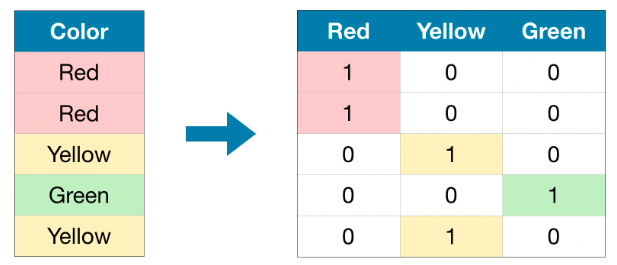
</div>

Una desventaja de este método es que estamos aumentando la dimensionalidad del conjunto de datos (es decir, aumentando el número de columnas o características categóricas a partir de las cuales entrenar el modelo), lo que puede resultar problemático si el número de muestras de las que se dispone no es suficientemente elevado.

Scikit-Learn implementa esta funcionalidad en la clase sklearn.preprocessing.OneHotEncoder y Pandas la implementa en la clase pandas.get_dummies.

Fuentes: 
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/one-hot-encoding
https://www.kaggle.com/code/alexisbcook/categorical-variables
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Ejemplo de aplicación
---

In [1]:
# asumo que estoy clasificando por marca autos que pasan por un semáforo en una calle de 1 solo carril. 
# a cada auto que pasa se le asigna "Ford", o "Renault", o o "Chevrolet", etc. 
# voy a armar una  lista, que representa el orden de las marcas de autos a medida que se fueron registrando

# lista de marcas de autos registrados 
import numpy as np
marcas_autos = ["Mercedes", "Ford", "Ford", "Renaut", "Ford", "VW", "Chevrolet", "BMW"]
#print(np.c_[marcas_autos])

# importo el modelo y lo aplico a la lista dada
from sklearn.preprocessing import OneHotEncoder

# entreno al modelo
codificador =  OneHotEncoder()
marcas_autos_codificadas = codificador.fit_transform(np.c_[marcas_autos])
# notar que las marcas de autos se tienen que pasar como una columna, por eso uso el metodo de numpy np.c_[]
mac = marcas_autos_codificadas.toarray()
mac

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

>Para que se entienda mejor la salida voy a agregarle etiquetas a las columnas y a generar un dataframe

In [2]:
import pandas as pd

# borro los duplicados con la funcion set, y con sorted los ordeno de forma alfabética
# de igual modo que los ordenó OHE. 
col_nombres = sorted(set(marcas_autos)) 

df = pd.DataFrame(mac, columns=col_nombres)
df

,BMW,Chevrolet,Ford,Mercedes,Renaut,VW
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0


>Cada fila de la matriz se corresponde con cada uno de los valores de la lista de autos "marcas_autos", a la que se le asigna con la columna correspondiente un valor 1 cuando hay coincidencia con la marca del auto. 